# 🚖 Commute Data Exploratory Analysis
This notebook analyzes Yango commute costs compared to a fixed K40 daily public transport cost.
We will explore daily, monthly, and yearly trends.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "yango_data.csv"  # Ensure this file is in the same directory
yango_data = pd.read_csv(file_path)

# Preview
yango_data.tail()
# Display settings

,Ride_Date,Email_Timestamp,From,Subject,Payment,Details
213,"September 5, 2025",05/09/2025 19:24,Yango <no-reply@yango.com>,"Yango ride report for September 5, 2025",K125,30 min
214,"September 6, 2025",06/09/2025 12:33,Yango <no-reply@yango.com>,"Yango ride report for September 6, 2025",K135,32 min
215,"September 6, 2025",06/09/2025 17:04,Yango <no-reply@yango.com>,"Yango ride report for September 6, 2025",K98,26 min
216,"September 16, 2025",16/09/2025 13:23,Yango <no-reply@yango.com>,"Yango ride report for September 16, 2025",K22,4 min
217,"September 18, 2025",18/09/2025 8:07,Yango <no-reply@yango.com>,"Yango ride report for September 18, 2025",K56,19 min


In [3]:

# Clean Payment column
yango_data['Payment_clean'] = yango_data['Payment'].str.replace("K", "").astype(float)

# Convert Ride_Date to datetime
yango_data['Ride_Date'] = pd.to_datetime(yango_data['Ride_Date'])

# Group by date (sum rides per day)
daily_costs = yango_data.groupby('Ride_Date')['Payment_clean'].sum().reset_index()

# Add public transport cost
daily_costs['Public_transport'] = 40

daily_costs.head()


,Ride_Date,Payment_clean,Public_transport
0,2024-09-17,56.0,40
1,2024-09-18,60.0,40
2,2024-09-19,44.0,40
3,2024-09-25,29.0,40
4,2024-09-26,99.0,40


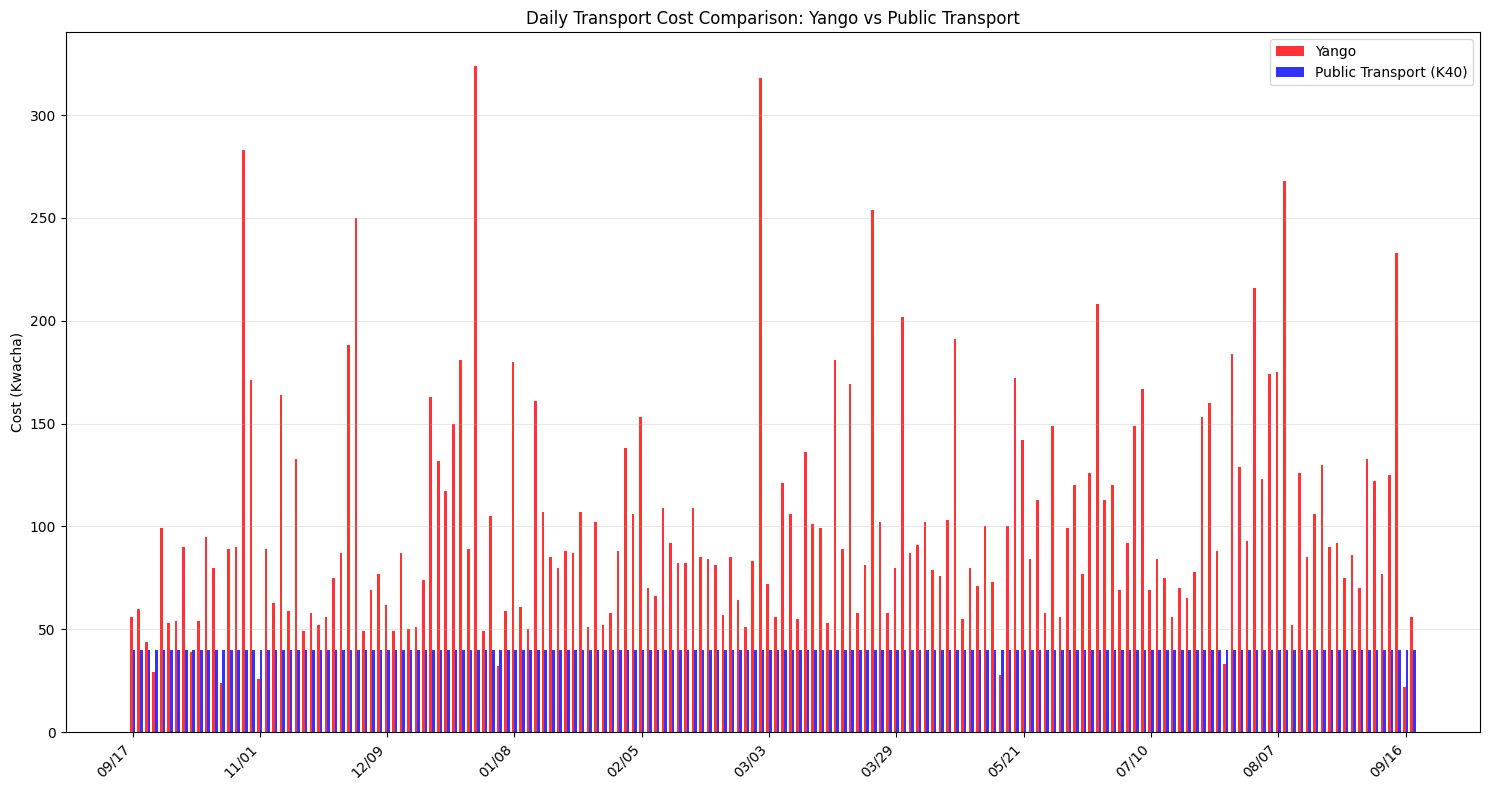

In [4]:
# Daily comparison visualization
plt.figure(figsize=(15,8))
bar_width = 0.35
dates = range(len(daily_costs))

plt.bar([d - bar_width/2 for d in dates], daily_costs['Payment_clean'], 
        width=bar_width, color='red', label='Yango', alpha=0.8)
plt.bar([d + bar_width/2 for d in dates], daily_costs['Public_transport'], 
        width=bar_width, color='blue', label='Public Transport (K40)', alpha=0.8)

# Improve date formatting - show fewer dates to avoid crowding
step = max(1, len(daily_costs) // 10)  # Show roughly 10 date labels
date_indices = range(0, len(daily_costs), step)
date_labels = [daily_costs['Ride_Date'].iloc[i].strftime("%m/%d") for i in date_indices]

plt.xticks(date_indices, date_labels, rotation=45, ha='right')
plt.ylabel("Cost (Kwacha)")
plt.title("Daily Transport Cost Comparison: Yango vs Public Transport")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:

# Add month column
daily_costs['Month'] = daily_costs['Ride_Date'].dt.to_period('M')

# Aggregate by month
monthly_costs = daily_costs.groupby('Month').agg({
    'Payment_clean': 'sum',
    'Public_transport': 'sum'
}).reset_index()

monthly_costs


,Month,Payment_clean,Public_transport
0,2024-09,341.0,240
1,2024-10,1069.0,440
2,2024-11,1398.0,600
3,2024-12,1861.0,720
4,2025-01,1328.0,600
5,2025-02,2003.0,800
6,2025-03,1871.0,720
7,2025-04,1310.0,520
8,2025-05,639.0,240
9,2025-06,1126.0,400


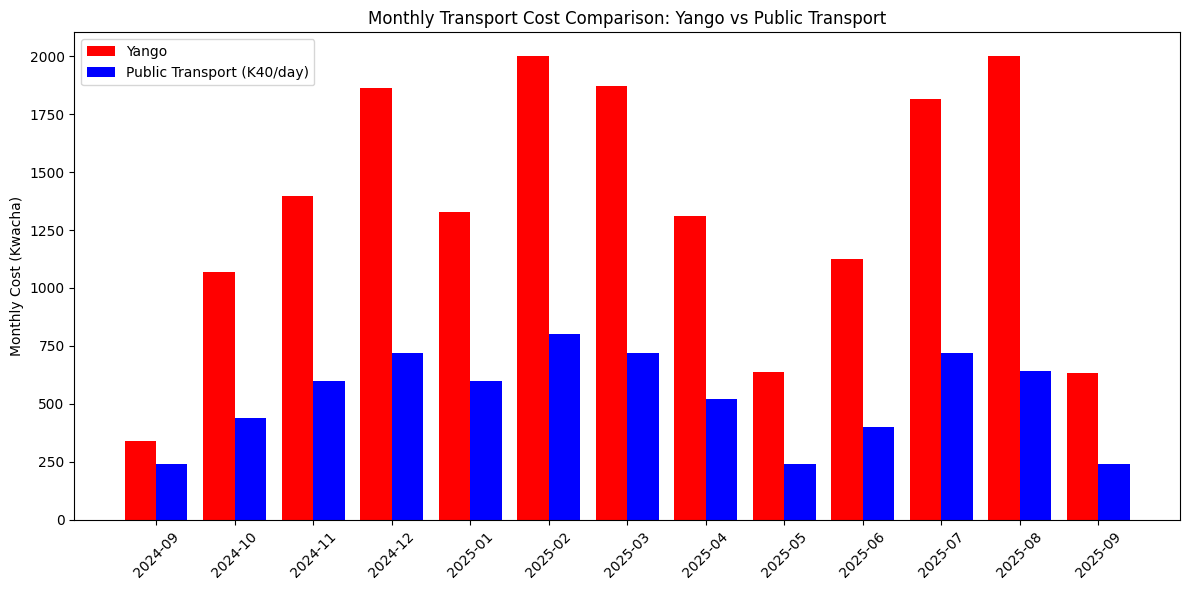

In [6]:

# Monthly comparison visualization
plt.figure(figsize=(12,6))
bar_width = 0.4
months = range(len(monthly_costs))

plt.bar([m - bar_width/2 for m in months], monthly_costs['Payment_clean'], 
        width=bar_width, color='red', label='Yango')
plt.bar([m + bar_width/2 for m in months], monthly_costs['Public_transport'], 
        width=bar_width, color='blue', label='Public Transport (K40/day)')

plt.xticks(months, monthly_costs['Month'].astype(str), rotation=45)
plt.ylabel("Monthly Cost (Kwacha)")
plt.title("Monthly Transport Cost Comparison: Yango vs Public Transport")
plt.legend()
plt.tight_layout()
plt.show()


📊 Weekly Yango Spending Analysis:
Total weekly spending: K17396.00
Average weekly spending: K370.13
Number of weeks with rides: 47


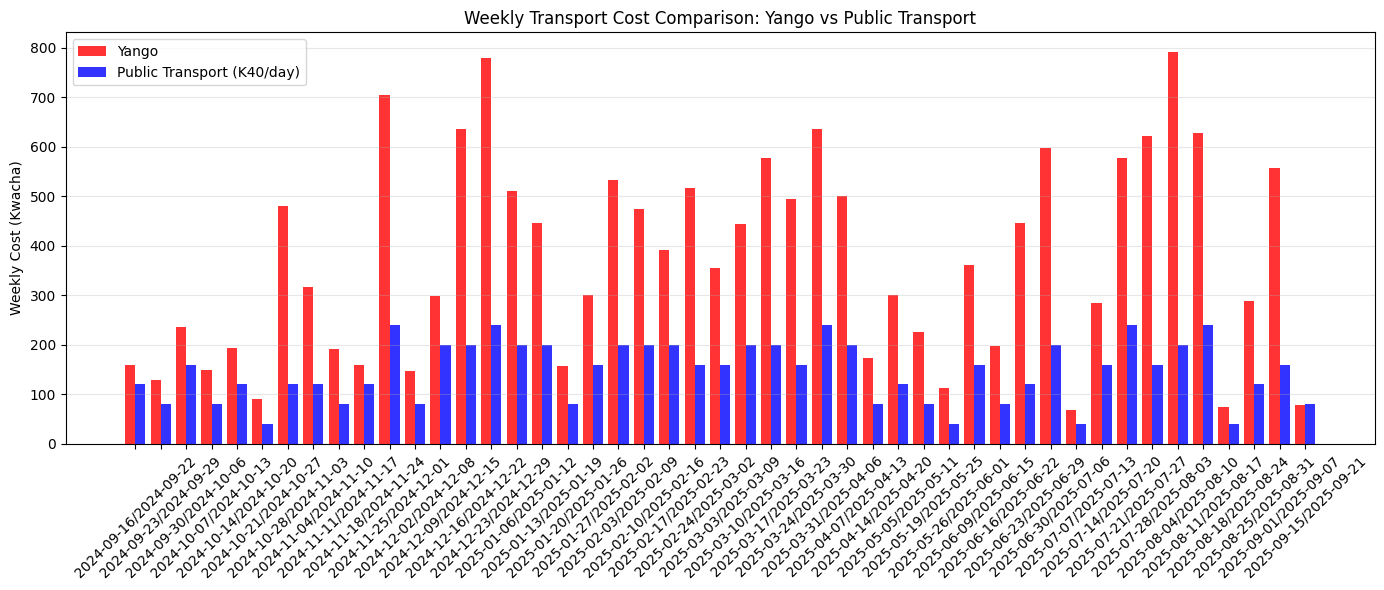

,Week,Payment_clean,Public_transport
0,2024-09-16/2024-09-22,160.0,120
1,2024-09-23/2024-09-29,128.0,80
2,2024-09-30/2024-10-06,236.0,160
3,2024-10-07/2024-10-13,149.0,80
4,2024-10-14/2024-10-20,193.0,120
5,2024-10-21/2024-10-27,90.0,40
6,2024-10-28/2024-11-03,480.0,120
7,2024-11-04/2024-11-10,316.0,120
8,2024-11-11/2024-11-17,192.0,80
9,2024-11-18/2024-11-24,159.0,120


In [7]:
# Weekly spending analysis
# Add week column
daily_costs['Week'] = daily_costs['Ride_Date'].dt.to_period('W')

# Aggregate by week
weekly_costs = daily_costs.groupby('Week').agg({
    'Payment_clean': 'sum',
    'Public_transport': 'sum'
}).reset_index()

# Calculate weekly totals
total_weekly_yango = weekly_costs['Payment_clean'].sum()
avg_weekly_yango = weekly_costs['Payment_clean'].mean()
total_weekly_public = weekly_costs['Public_transport'].sum()
avg_weekly_public = weekly_costs['Public_transport'].mean()

print(f"📊 Weekly Yango Spending Analysis:")
print(f"Total weekly spending: K{total_weekly_yango:.2f}")
print(f"Average weekly spending: K{avg_weekly_yango:.2f}")
print(f"Number of weeks with rides: {len(weekly_costs)}")

# Weekly comparison visualization
plt.figure(figsize=(14,6))
bar_width = 0.4
weeks = range(len(weekly_costs))

plt.bar([w - bar_width/2 for w in weeks], weekly_costs['Payment_clean'], 
        width=bar_width, color='red', label='Yango', alpha=0.8)
plt.bar([w + bar_width/2 for w in weeks], weekly_costs['Public_transport'], 
        width=bar_width, color='blue', label='Public Transport (K40/day)', alpha=0.8)

plt.xticks(weeks, [str(w) for w in weekly_costs['Week']], rotation=45)
plt.ylabel("Weekly Cost (Kwacha)")
plt.title("Weekly Transport Cost Comparison: Yango vs Public Transport")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

weekly_costs

📊 Day of Week Analysis:
Most rides on: Thursday (42 rides)
Highest spending on: Wednesday (K3134.00)
Least rides on: Sunday (11 rides)


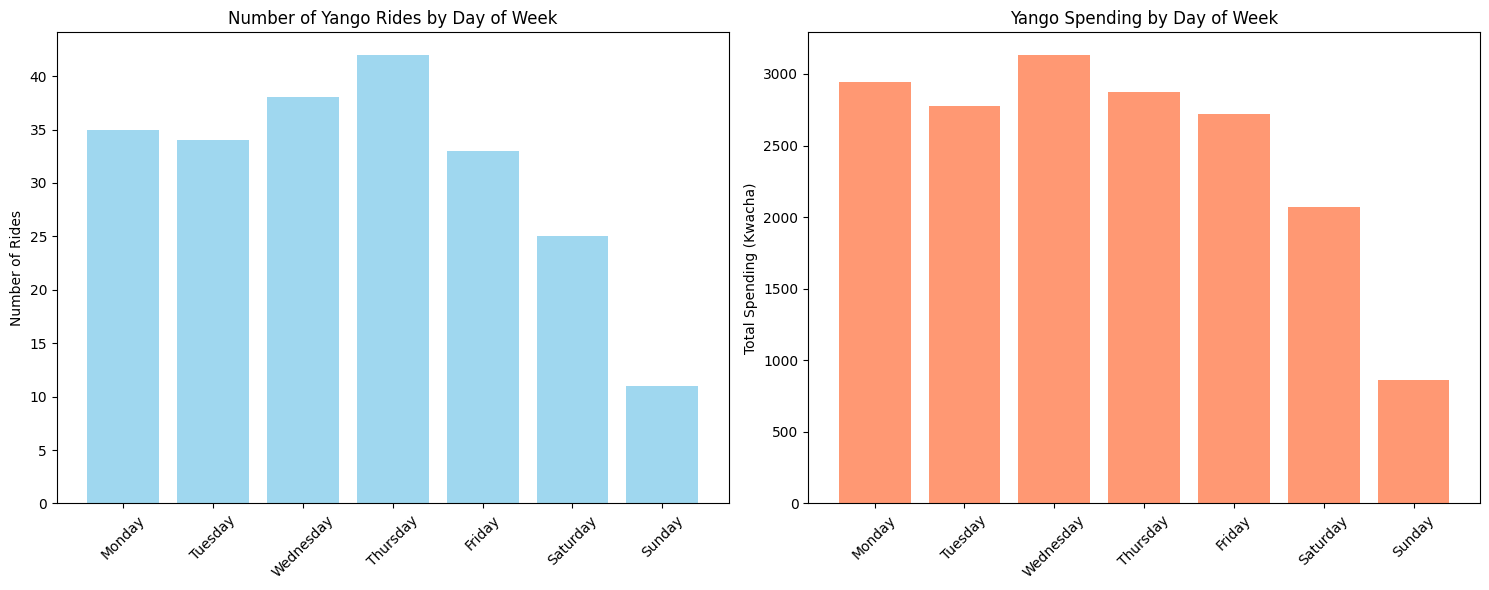


Detailed breakdown:
Monday: 35 rides, K2947.00 total
Tuesday: 34 rides, K2779.00 total
Wednesday: 38 rides, K3134.00 total
Thursday: 42 rides, K2877.00 total
Friday: 33 rides, K2722.00 total
Saturday: 25 rides, K2074.00 total
Sunday: 11 rides, K863.00 total


In [8]:
# Day of the week analysis - Question 2
# Add day of week to the original data
yango_data['Day_of_Week'] = yango_data['Ride_Date'].dt.day_name()
yango_data['Day_of_Week_Num'] = yango_data['Ride_Date'].dt.dayofweek

# Count rides by day of week
rides_by_day = yango_data['Day_of_Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Calculate spending by day of week
spending_by_day = yango_data.groupby('Day_of_Week')['Payment_clean'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print(f"📊 Day of Week Analysis:")
print(f"Most rides on: {rides_by_day.idxmax()} ({rides_by_day.max()} rides)")
print(f"Highest spending on: {spending_by_day.idxmax()} (K{spending_by_day.max():.2f})")
print(f"Least rides on: {rides_by_day.idxmin()} ({rides_by_day.min()} rides)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Rides by day
ax1.bar(rides_by_day.index, rides_by_day.values, color='skyblue', alpha=0.8)
ax1.set_title('Number of Yango Rides by Day of Week')
ax1.set_ylabel('Number of Rides')
ax1.tick_params(axis='x', rotation=45)

# Spending by day
ax2.bar(spending_by_day.index, spending_by_day.values, color='coral', alpha=0.8)
ax2.set_title('Yango Spending by Day of Week')
ax2.set_ylabel('Total Spending (Kwacha)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nDetailed breakdown:")
for day in rides_by_day.index:
    print(f"{day}: {rides_by_day[day]} rides, K{spending_by_day[day]:.2f} total")

📊 Monthly Usage Frequency Analysis:
Total months with Yango usage: 13
Most active month: Dec 2024 (25 rides)
Least active month: May 2025 (6 rides)
Average rides per month: 16.8


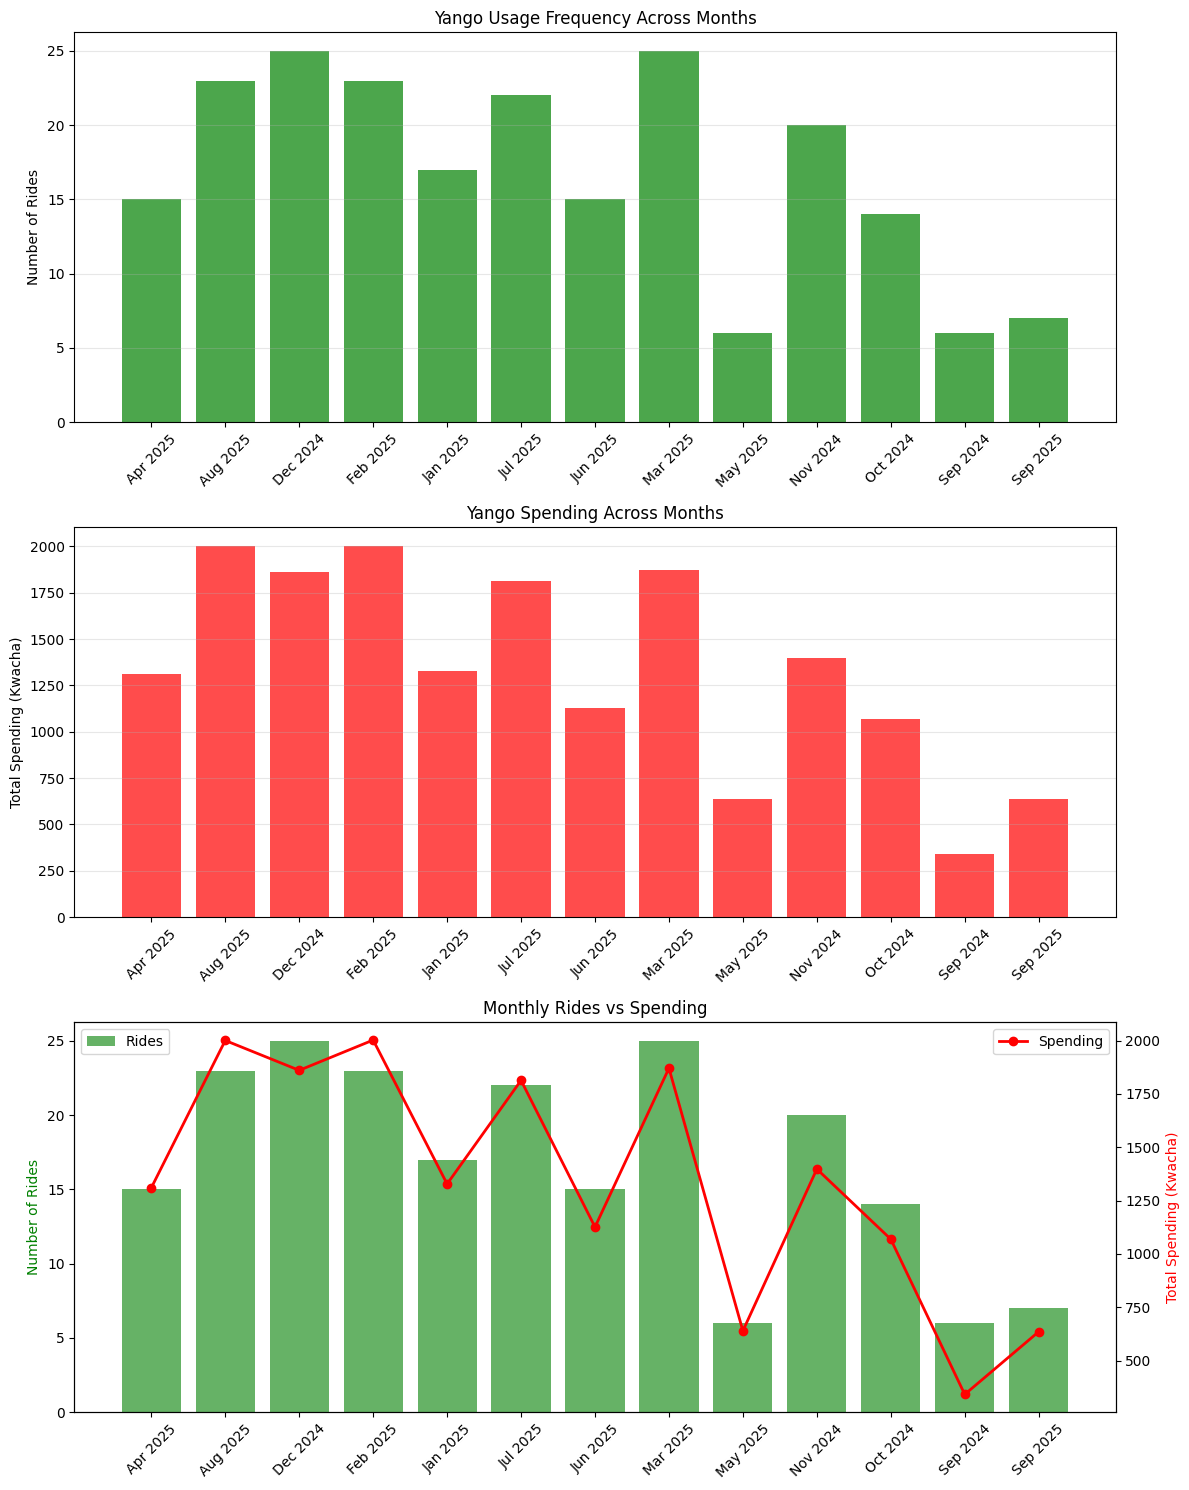


Monthly breakdown:
Apr 2025: 15 rides, K1310.00 total, K87.33 avg per ride
Aug 2025: 23 rides, K2001.00 total, K87.00 avg per ride
Dec 2024: 25 rides, K1861.00 total, K74.44 avg per ride
Feb 2025: 23 rides, K2003.00 total, K87.09 avg per ride
Jan 2025: 17 rides, K1328.00 total, K78.12 avg per ride
Jul 2025: 22 rides, K1814.00 total, K82.45 avg per ride
Jun 2025: 15 rides, K1126.00 total, K75.07 avg per ride
Mar 2025: 25 rides, K1871.00 total, K74.84 avg per ride
May 2025: 6 rides, K639.00 total, K106.50 avg per ride
Nov 2024: 20 rides, K1398.00 total, K69.90 avg per ride
Oct 2024: 14 rides, K1069.00 total, K76.36 avg per ride
Sep 2024: 6 rides, K341.00 total, K56.83 avg per ride
Sep 2025: 7 rides, K635.00 total, K90.71 avg per ride


In [9]:
# Enhanced monthly usage frequency analysis - Question 3
# Add month name for better readability
yango_data['Month_Name'] = yango_data['Ride_Date'].dt.strftime('%B %Y')
yango_data['Month_Short'] = yango_data['Ride_Date'].dt.strftime('%b %Y')

# Count rides per month (frequency)
rides_per_month = yango_data['Month_Short'].value_counts().sort_index()
spending_per_month = yango_data.groupby('Month_Short')['Payment_clean'].sum().sort_index()

print(f"📊 Monthly Usage Frequency Analysis:")
print(f"Total months with Yango usage: {len(rides_per_month)}")
print(f"Most active month: {rides_per_month.idxmax()} ({rides_per_month.max()} rides)")
print(f"Least active month: {rides_per_month.idxmin()} ({rides_per_month.min()} rides)")
print(f"Average rides per month: {rides_per_month.mean():.1f}")

# Create comprehensive monthly analysis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Monthly ride frequency
ax1.bar(rides_per_month.index, rides_per_month.values, color='green', alpha=0.7)
ax1.set_title('Yango Usage Frequency Across Months')
ax1.set_ylabel('Number of Rides')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Monthly spending
ax2.bar(spending_per_month.index, spending_per_month.values, color='red', alpha=0.7)
ax2.set_title('Yango Spending Across Months')
ax2.set_ylabel('Total Spending (Kwacha)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Combined view - frequency vs spending
ax3_twin = ax3.twinx()
ax3.bar(rides_per_month.index, rides_per_month.values, alpha=0.6, color='green', label='Rides')
ax3_twin.plot(spending_per_month.index, spending_per_month.values, color='red', marker='o', linewidth=2, label='Spending')
ax3.set_title('Monthly Rides vs Spending')
ax3.set_ylabel('Number of Rides', color='green')
ax3_twin.set_ylabel('Total Spending (Kwacha)', color='red')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\nMonthly breakdown:")
for month in rides_per_month.index:
    avg_cost = spending_per_month[month] / rides_per_month[month]
    print(f"{month}: {rides_per_month[month]} rides, K{spending_per_month[month]:.2f} total, K{avg_cost:.2f} avg per ride")

In [10]:

# Average daily costs
avg_yango = daily_costs['Payment_clean'].mean()
avg_public = daily_costs['Public_transport'].mean()
avg_extra = avg_yango - avg_public

avg_yango, avg_public, avg_extra


(np.float64(101.13953488372093),
 np.float64(40.0),
 np.float64(61.13953488372093))

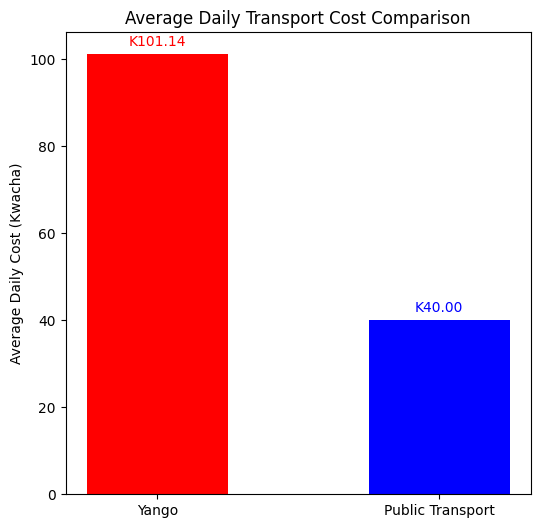

In [11]:

# Average cost comparison
plt.figure(figsize=(6,6))

plt.bar(['Yango', 'Public Transport'], [avg_yango, avg_public], 
        color=['red', 'blue'], width=0.5)

plt.ylabel("Average Daily Cost (Kwacha)")
plt.title("Average Daily Transport Cost Comparison")
plt.text(0, avg_yango+2, f"K{avg_yango:.2f}", ha='center', color='red')
plt.text(1, avg_public+2, f"K{avg_public:.2f}", ha='center', color='blue')

plt.show()


Average ride duration: 26.8 minutes
Monthly extra cost over public transport: K1834.19
Yearly extra cost over public transport: K22315.93


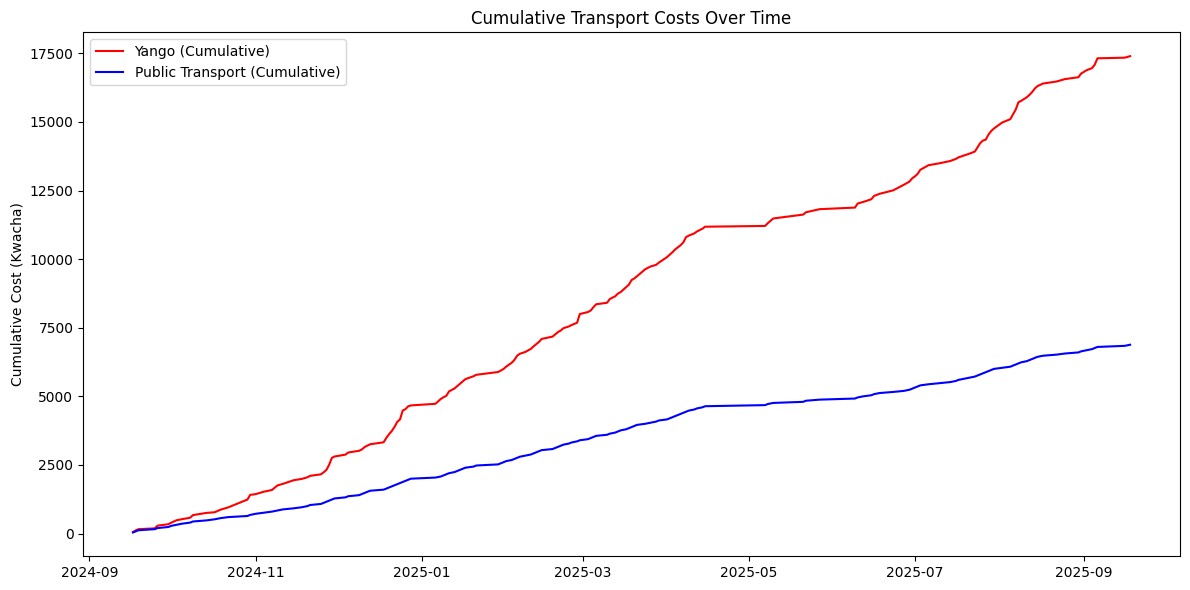

In [12]:
# Extract ride duration (remove 'min' and convert to numeric)
yango_data['Duration_min'] = yango_data['Details'].str.replace("min", "").str.strip().astype(float)

# Average duration in minutes
avg_duration = yango_data['Duration_min'].mean()
print(f"Average ride duration: {avg_duration:.1f} minutes")

# Monthly and yearly extra cost projections
monthly_extra = avg_extra * 30
yearly_extra = avg_extra * 365

print(f"Monthly extra cost over public transport: K{monthly_extra:.2f}")
print(f"Yearly extra cost over public transport: K{yearly_extra:.2f}")

# Cumulative costs over time
daily_costs['Cumulative_Yango'] = daily_costs['Payment_clean'].cumsum()
daily_costs['Cumulative_Public'] = daily_costs['Public_transport'].cumsum()

plt.figure(figsize=(12,6))
plt.plot(daily_costs['Ride_Date'], daily_costs['Cumulative_Yango'], color='red', label='Yango (Cumulative)')
plt.plot(daily_costs['Ride_Date'], daily_costs['Cumulative_Public'], color='blue', label='Public Transport (Cumulative)')

plt.ylabel("Cumulative Cost (Kwacha)")
plt.title("Cumulative Transport Costs Over Time")
plt.legend()
plt.tight_layout()
plt.show()

📊 Time of Day Usage Analysis:
Most rides at: 7:00 (112 rides)
Highest spending at: 7:00 (K8606.00)
Peak hours (most rides): [7, 18, 8]


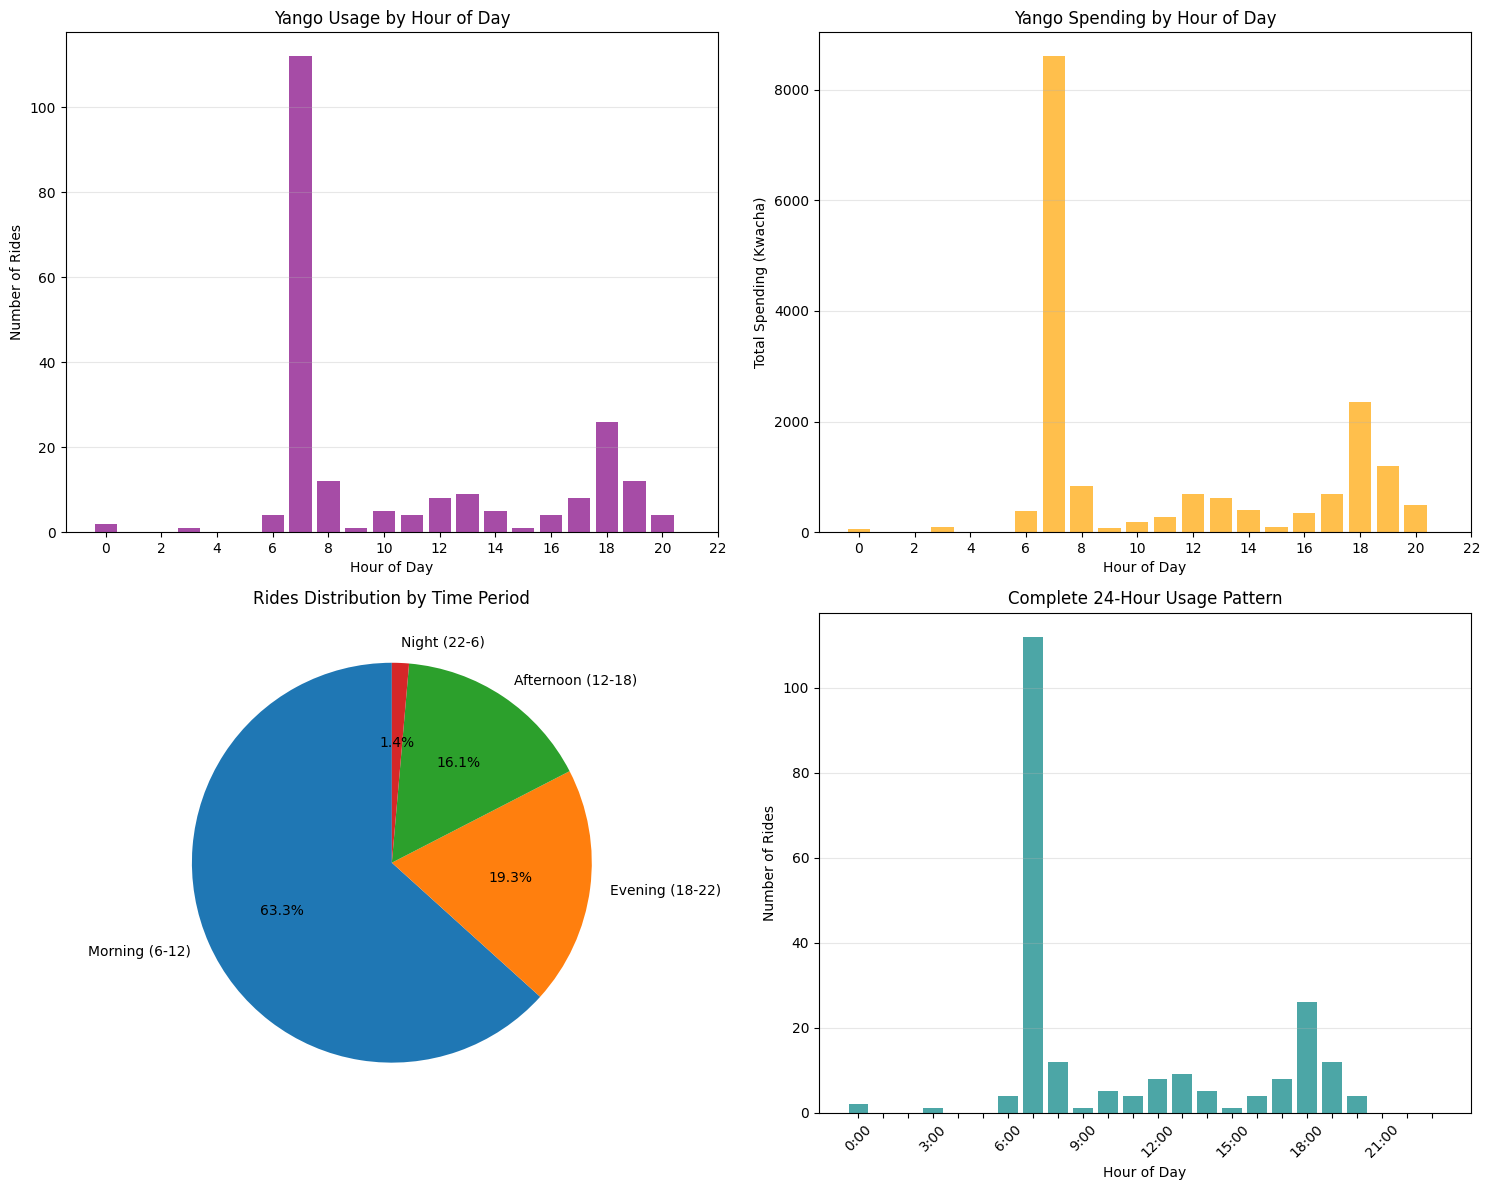


Time period breakdown:
Morning (6-12): 138 rides, K10352.00 total
Evening (18-22): 42 rides, K4028.00 total
Afternoon (12-18): 35 rides, K2852.00 total
Night (22-6): 3 rides, K164.00 total

Hourly details:
00:00 - 2 rides, K65.00 total, K32.50 avg
03:00 - 1 rides, K99.00 total, K99.00 avg
06:00 - 4 rides, K383.00 total, K95.75 avg
07:00 - 112 rides, K8606.00 total, K76.84 avg
08:00 - 12 rides, K833.00 total, K69.42 avg
09:00 - 1 rides, K76.00 total, K76.00 avg
10:00 - 5 rides, K185.00 total, K37.00 avg
11:00 - 4 rides, K269.00 total, K67.25 avg
12:00 - 8 rides, K698.00 total, K87.25 avg
13:00 - 9 rides, K626.00 total, K69.56 avg
14:00 - 5 rides, K407.00 total, K81.40 avg
15:00 - 1 rides, K88.00 total, K88.00 avg
16:00 - 4 rides, K342.00 total, K85.50 avg
17:00 - 8 rides, K691.00 total, K86.38 avg
18:00 - 26 rides, K2348.00 total, K90.31 avg
19:00 - 12 rides, K1191.00 total, K99.25 avg
20:00 - 4 rides, K489.00 total, K122.25 avg


In [13]:
# Enhanced time of day analysis - Question 5
# Extract hour from Email_Timestamp (format: DD/MM/YYYY HH:MM)
yango_data['Timestamp_parsed'] = pd.to_datetime(yango_data['Email_Timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
yango_data['Hour'] = yango_data['Timestamp_parsed'].dt.hour - 1

# Remove any rows where timestamp parsing failed
valid_times = yango_data.dropna(subset=['Hour'])

# Count rides per hour
rides_by_hour = valid_times['Hour'].value_counts().sort_index()

# Calculate spending by hour
spending_by_hour = valid_times.groupby('Hour')['Payment_clean'].sum()

print(f"📊 Time of Day Usage Analysis:")
print(f"Most rides at: {rides_by_hour.idxmax()}:00 ({rides_by_hour.max()} rides)")
print(f"Highest spending at: {spending_by_hour.idxmax()}:00 (K{spending_by_hour.max():.2f})")
print(f"Peak hours (most rides): {rides_by_hour.nlargest(3).index.tolist()}")

# Create time period categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning (6-12)'
    elif 12 <= hour < 18:
        return 'Afternoon (12-18)'
    elif 18 <= hour < 22:
        return 'Evening (18-22)'
    else:
        return 'Night (22-6)'

valid_times['Time_Period'] = valid_times['Hour'].apply(categorize_time)
rides_by_period = valid_times['Time_Period'].value_counts()

# Comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Hourly rides distribution
ax1.bar(rides_by_hour.index, rides_by_hour.values, color='purple', alpha=0.7)
ax1.set_xticks(range(0, 24, 2))
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Number of Rides")
ax1.set_title("Yango Usage by Hour of Day")
ax1.grid(axis='y', alpha=0.3)

# Hourly spending
ax2.bar(spending_by_hour.index, spending_by_hour.values, color='orange', alpha=0.7)
ax2.set_xticks(range(0, 24, 2))
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Total Spending (Kwacha)")
ax2.set_title("Yango Spending by Hour of Day")
ax2.grid(axis='y', alpha=0.3)

# Time period analysis
ax3.pie(rides_by_period.values, labels=rides_by_period.index, autopct='%1.1f%%', startangle=90)
ax3.set_title("Rides Distribution by Time Period")

# Heatmap-style hourly view
hours = list(range(24))
hour_values = [rides_by_hour.get(h, 0) for h in hours]
ax4.bar(hours, hour_values, color='teal', alpha=0.7)
ax4.set_xticks(range(0, 24, 1))
ax4.set_xlabel("Hour of Day")
ax4.set_ylabel("Number of Rides")
ax4.set_title("Complete 24-Hour Usage Pattern")
ax4.grid(axis='y', alpha=0.3)

# Add time labels for better readability
time_labels = [f"{h}:00" if h % 3 == 0 else "" for h in range(24)]
ax4.set_xticklabels(time_labels, rotation=45)

plt.tight_layout()
plt.show()

print(f"\nTime period breakdown:")
for period in rides_by_period.index:
    period_spending = valid_times[valid_times['Time_Period'] == period]['Payment_clean'].sum()
    print(f"{period}: {rides_by_period[period]} rides, K{period_spending:.2f} total")

print(f"\nHourly details:")
for hour in rides_by_hour.index:
    spending = spending_by_hour.get(hour, 0)
    avg_cost = spending / rides_by_hour[hour] if rides_by_hour[hour] > 0 else 0
    print(f"{hour:02d}:00 - {rides_by_hour[hour]} rides, K{spending:.2f} total, K{avg_cost:.2f} avg")

📊 Yango Ride Duration Statistics:
Total time spent on Yango rides: 5819.0 minutes (97.0 hours)
Average ride duration: 26.8 minutes
Median ride duration: 26.0 minutes
Shortest ride: 3.0 minutes
Longest ride: 56.0 minutes
Total number of rides: 218


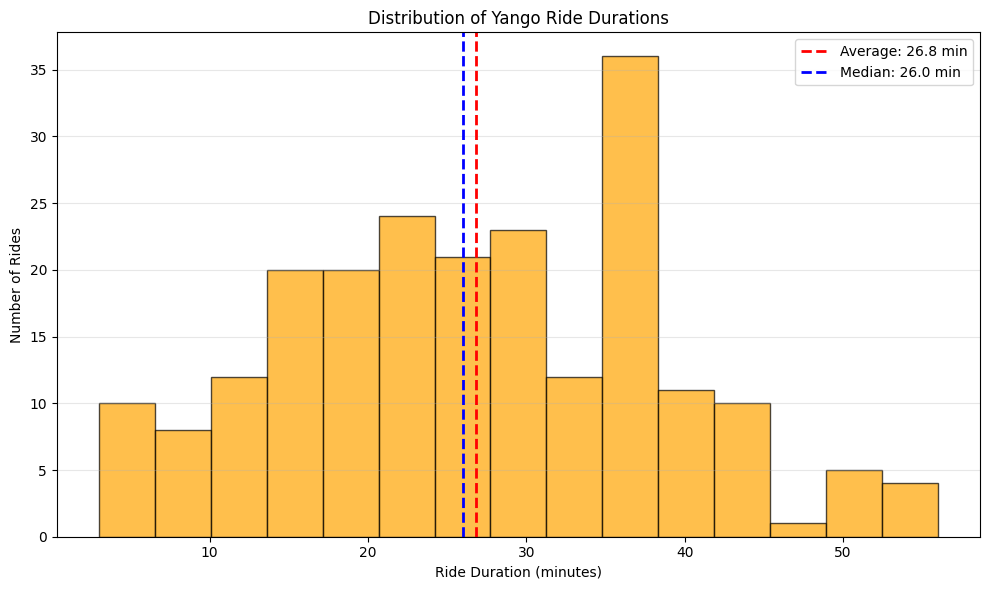

In [14]:
# Calculate average duration of Yango rides
total_time = yango_data['Duration_min'].sum()
average_time = yango_data['Duration_min'].mean()
median_time = yango_data['Duration_min'].median()
min_time = yango_data['Duration_min'].min()
max_time = yango_data['Duration_min'].max()

print(f"📊 Yango Ride Duration Statistics:")
print(f"Total time spent on Yango rides: {total_time:.1f} minutes ({total_time/60:.1f} hours)")
print(f"Average ride duration: {average_time:.1f} minutes")
print(f"Median ride duration: {median_time:.1f} minutes")
print(f"Shortest ride: {min_time:.1f} minutes")
print(f"Longest ride: {max_time:.1f} minutes")
print(f"Total number of rides: {len(yango_data)}")

# Visualize ride duration distribution
plt.figure(figsize=(10,6))
plt.hist(yango_data['Duration_min'], bins=15, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(average_time, color='red', linestyle='--', linewidth=2, label=f'Average: {average_time:.1f} min')
plt.axvline(median_time, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_time:.1f} min')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Yango Ride Durations')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# 📋 COMPREHENSIVE SUMMARY - All 5 Questions Answered

print("🚖 YANGO USAGE ANALYSIS SUMMARY")
print("=" * 50)

# Question 1: Spending breakdown
total_yearly = yango_data['Payment_clean'].sum()
total_monthly = total_yearly / len(yango_data['Month_Short'].unique())
total_weekly = weekly_costs['Payment_clean'].mean()

print(f"\n1️⃣ SPENDING BREAKDOWN:")
print(f"   📅 Yearly spending: K{total_yearly:.2f}")
print(f"   📅 Average monthly: K{total_monthly:.2f}")
print(f"   📅 Average weekly: K{total_weekly:.2f}")

# Question 2: Most used day
most_used_day = yango_data['Day_of_Week'].value_counts().idxmax()
most_used_count = yango_data['Day_of_Week'].value_counts().max()

print(f"\n2️⃣ MOST USED DAY:")
print(f"   📊 {most_used_day} ({most_used_count} rides)")

# Question 3: Monthly frequency
months_with_rides = len(yango_data['Month_Short'].unique())
avg_rides_per_month = len(yango_data) / months_with_rides

print(f"\n3️⃣ MONTHLY USAGE FREQUENCY:")
print(f"   📈 Active months: {months_with_rides}")
print(f"   📈 Average rides per month: {avg_rides_per_month:.1f}")

# Question 4: Average ride duration
avg_duration = yango_data['Duration_min'].mean()
total_time_hours = yango_data['Duration_min'].sum() / 60

print(f"\n4️⃣ RIDE DURATION:")
print(f"   ⏱️  Average ride: {avg_duration:.1f} minutes")
print(f"   ⏱️  Total time: {total_time_hours:.1f} hours")

# Question 5: Peak usage time
peak_hour = valid_times['Hour'].value_counts().idxmax()
peak_count = valid_times['Hour'].value_counts().max()

print(f"\n5️⃣ PEAK USAGE TIME:")
print(f"   🕐 Peak hour: {peak_hour}:00 ({peak_count} rides)")

print("\n" + "=" * 50)
print("✅ All questions have been analyzed!")
print("📊 Check the visualizations above for detailed insights.")

🚖 YANGO USAGE ANALYSIS SUMMARY

1️⃣ SPENDING BREAKDOWN:
   📅 Yearly spending: K17396.00
   📅 Average monthly: K1338.15
   📅 Average weekly: K370.13

2️⃣ MOST USED DAY:
   📊 Thursday (42 rides)

3️⃣ MONTHLY USAGE FREQUENCY:
   📈 Active months: 13
   📈 Average rides per month: 16.8

4️⃣ RIDE DURATION:
   ⏱️  Average ride: 26.8 minutes
   ⏱️  Total time: 97.0 hours

5️⃣ PEAK USAGE TIME:
   🕐 Peak hour: 7:00 (112 rides)

✅ All questions have been analyzed!
📊 Check the visualizations above for detailed insights.
